In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

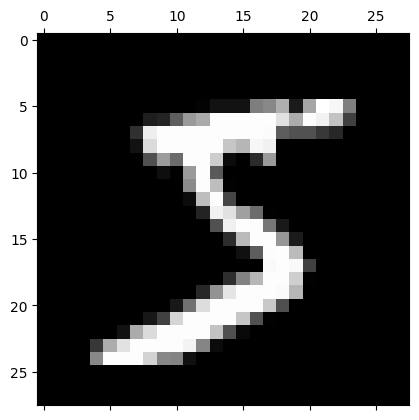

In [6]:
plt.matshow(X_train[0], cmap='gray')
#plt.imshow(X_train[0], cmap='gray')

In [7]:
y_train[0]

5

In [8]:
# Normalize the input data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [9]:
# Define the model architecture
model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2154 - accuracy: 0.9335 - val_loss: 0.0969 - val_accuracy: 0.9705
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1077 - accuracy: 0.9657 - val_loss: 0.0873 - val_accuracy: 0.9738
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0798 - accuracy: 0.9755 - val_loss: 0.0733 - val_accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0683 - accuracy: 0.9788 - val_loss: 0.0803 - val_accuracy: 0.9782
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0604 - accuracy: 0.9810 - val_loss: 0.0742 - val_accuracy: 0.9793


In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0742 - accuracy: 0.9793


[0.07418376952409744, 0.9793000221252441]

In [13]:
Y_predicted = model.predict(X_test)
Y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([7.2349622e-12, 4.3697057e-10, 3.8436071e-10, 1.2260006e-09,
       1.4987767e-12, 7.3136272e-13, 1.2181404e-17, 9.9999982e-01,
       3.2202585e-12, 1.2913975e-07], dtype=float32)

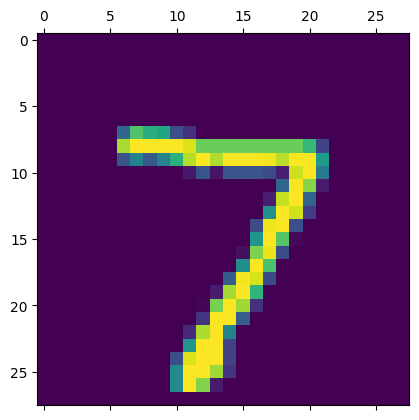

In [14]:
plt.matshow(X_test[0])

In [15]:
np.argmax(Y_predicted[0])

7

In [16]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]

In [17]:
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    0,    1,    0,    0,    2,    1,    2,    1],
       [   0, 1128,    2,    2,    0,    0,    2,    0,    1,    0],
       [   5,    1, 1005,    4,    3,    0,    2,    9,    2,    1],
       [   0,    0,    0,  995,    0,    0,    0,    7,    3,    5],
       [   0,    2,    3,    0,  959,    0,    4,    1,    0,   13],
       [   3,    0,    0,   11,    0,  862,    5,    1,    4,    6],
       [   3,    3,    0,    1,    3,    3,  943,    0,    2,    0],
       [   1,    4,    6,    0,    1,    0,    0, 1008,    0,    8],
       [   1,    1,    5,    7,    5,    2,    2,    5,  939,    7],
       [   1,    5,    0,    6,    9,    2,    0,    3,    1,  982]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

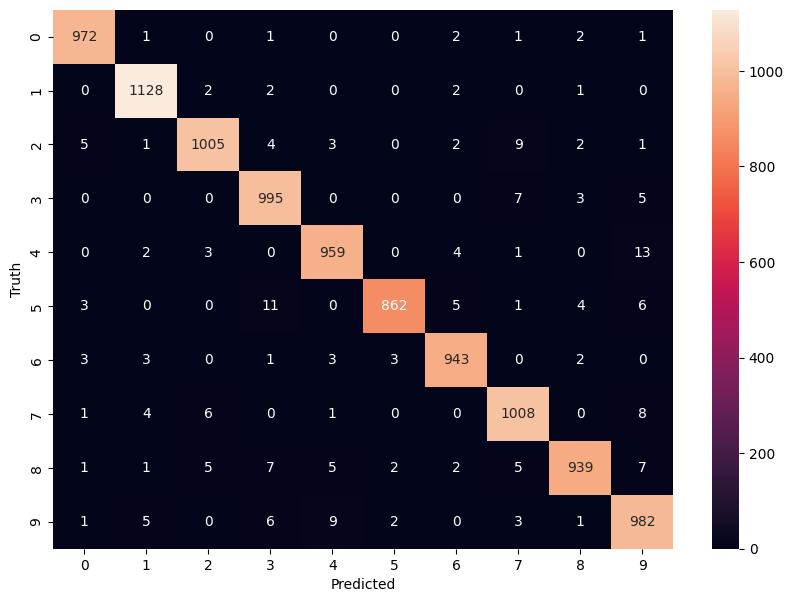

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
L_ic_X = []
L_ic_Y = []
L_cc_X = []
L_cc_Y = []
wrong_pred = []
correct_pred = []

for i in range(y_test.shape[0]):
  if(y_test[i] != Y_predicted_labels[i]):
    L_ic_X.append(X_test[i])
    L_ic_Y.append(y_test[i])
    wrong_pred.append(Y_predicted_labels[i])
  else:
    L_cc_X.append(X_test[i])
    L_cc_Y.append(y_test[i])
    correct_pred.append(Y_predicted_labels[i])
print(len(L_ic_X))
print(len(L_ic_Y))
print(len(L_cc_X))
print(len(L_cc_Y))

207
207
9793
9793


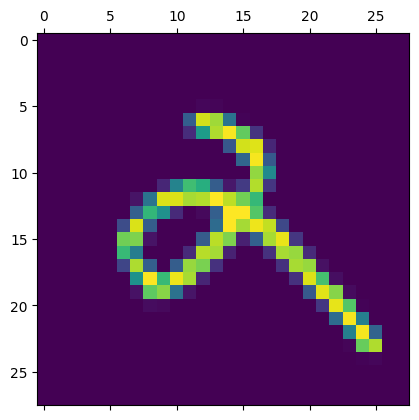

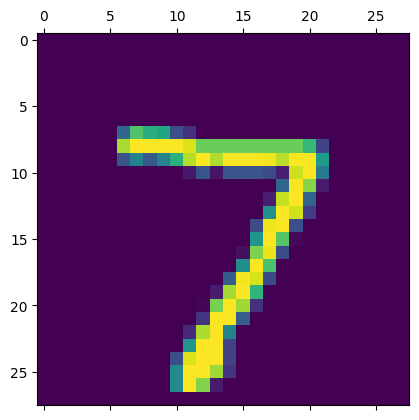

In [29]:
plt.matshow(L_ic_X[0])
plt.matshow(L_cc_X[0])

In [30]:
print(wrong_pred[0])
print(correct_pred[0])

9
7
